In [1]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy as np

df_test = pd.read_csv('test.csv')
data_path = "/images"
path = os.path.join(data_path , "*png")

testIds = df_test["id"].values.tolist();

# Reading all images and append them to data list
files = glob.glob(path)


data_X = []
data_Y = []

for file in files:
    file_name = os.path.basename(file)
    id = os.path.splitext(file_name)[0]
    
    try:
        testIds.index(int(id))
    except:
        image = cv2.imread(file)
        img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        data_X.append(img_gray)
        data_Y.append(id)


In [2]:
## reading and processing all csv data files
df_train = pd.read_csv('train.csv')

trainIds = df_train["id"].values.tolist()
trainLabels = df_train["class"].values.tolist()
labels = np.unique(np.array(trainLabels))

Y = []

for id in data_Y:
    index = trainIds.index(int(id))
    Y.append(np.where(labels == trainLabels[index])[0][0])
    
Y = np.array(Y)
X = np.array(data_X).astype('float32') / 255

print(X.shape)
print(Y.shape)


(4000, 112, 224)
(4000,)


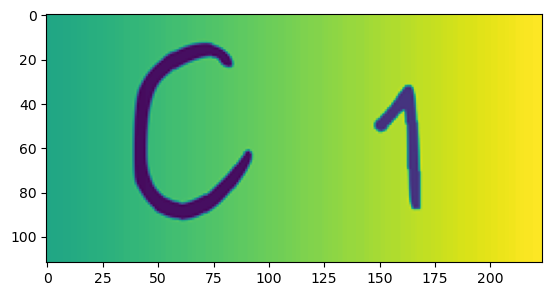

C1


In [3]:
import matplotlib.pyplot as plt

img_id = 255

image = X[img_id]
label = Y[img_id]

plt.imshow(image)
plt.show()
print(labels[label])

In [4]:
from tensorflow.keras.utils import to_categorical

classes = len(labels)

Y_categorize = to_categorical(Y, classes)
print(Y_categorize.shape)

(4000, 20)


In [5]:
print(X.shape, Y_categorize.shape)
# print(test_X.shape)

(4000, 112, 224) (4000, 20)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(112, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X, Y_categorize, batch_size=128,epochs=100,verbose=1, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 13s 88ms/step - loss: 2.9973 - accuracy: 0.0553 - val_loss: 2.9951 - val_accuracy: 0.0587
Epoch 2/100
25/25 [==============================] - 2s 66ms/step - loss: 2.9939 - accuracy: 0.0616 - val_loss: 2.9887 - val_accuracy: 0.0562
Epoch 3/100
25/25 [==============================] - 2s 67ms/step - loss: 2.9079 - accuracy: 0.0812 - val_loss: 2.6862 - val_accuracy: 0.1713
Epoch 4/100
25/25 [==============================] - 2s 67ms/step - loss: 2.6055 - accuracy: 0.1703 - val_loss: 2.1010 - val_accuracy: 0.3425
Epoch 5/100
25/25 [==============================] - 2s 67ms/step - loss: 2.1484 - accuracy: 0.2837 - val_loss: 1.4843 - val_accuracy: 0.5825
Epoch 6/100
25/25 [==============================] - 2s 68ms/step - loss: 1.7121 - accuracy: 0.4216 - val_loss: 0.9201 - val_accuracy: 0.7400
Epoch 7/100
25/25 [==============================] - 2s 67ms/step - loss: 1.2915 - accuracy: 0.5441 - val_loss: 0.5219 - val_accuracy: 0.8687
Epoch

In [9]:
X_test = []

for id in testIds:
    for file in files:
        file_name = os.path.basename(file)
        fileId = os.path.splitext(file_name)[0]

        if(int(fileId) == int(id)):
            image = cv2.imread(file)
            img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            X_test.append(img_gray)
            break

x_predict = X_test
X_test = np.array(X_test).astype('float32') / 255


In [10]:
predictions = model.predict([X_test])


32/32 [==============================] - 0s 7ms/step


In [13]:
predLabels = []

for pred in predictions:
    predLabels.append(labels[np.argmax(pred)])


#create a submission file
df = pd.DataFrame({'id':df_test['id'], 'class':predLabels}, columns=['id', 'class'])
df.to_csv('result.csv', index=False)


In [12]:
for x in range(len(testIds)):
    cv2.imwrite(f'/kaggle/working/output/{predLabels[x]}.png', x_predict[x])